## Credit Card Approval Classifier
<p>Dataset: <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository

In [1]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## 2. Inspecting the applications
<p> The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. </p>

In [4]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [5]:
cc_apps[0].value_counts()

0
b    468
a    210
?     12
Name: count, dtype: int64

## 3. Splitting the dataset into train and test sets
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. To get a better sense, we can measure their <a href="https://realpython.com/numpy-scipy-pandas-correlation-python/">statistical correlation</a> to the labels of the dataset.

In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop([11, 13], axis=1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

## 4. Handling the missing values (part I)

In [7]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace('?', np.nan)
cc_apps_test = cc_apps_test.replace('?', np.nan)

In [11]:
cc_apps_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 382 to 102
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       454 non-null    object 
 1   1       457 non-null    float64
 2   2       462 non-null    float64
 3   3       456 non-null    object 
 4   4       456 non-null    object 
 5   5       455 non-null    object 
 6   6       455 non-null    object 
 7   7       462 non-null    float64
 8   8       462 non-null    object 
 9   9       462 non-null    object 
 10  10      462 non-null    int64  
 11  12      462 non-null    object 
 12  14      462 non-null    int64  
 13  15      462 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 54.1+ KB


In [10]:
#Transform column 1 into float64
cc_apps_train[1] = cc_apps_train[1].astype('float64')
cc_apps_test[1] = cc_apps_test[1].astype('float64')

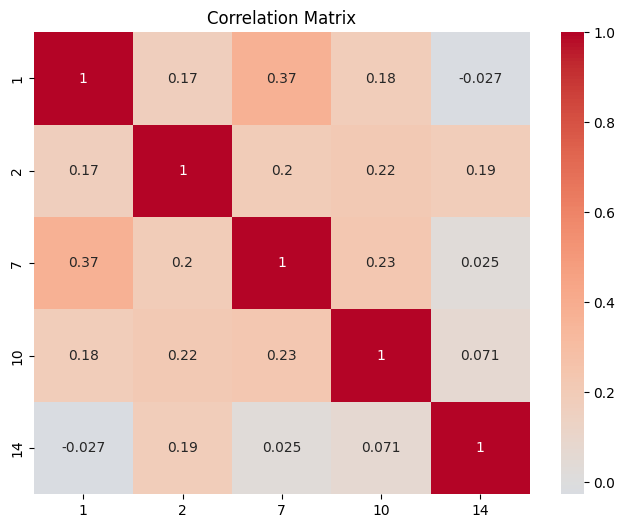

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = cc_apps_train.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = cc_apps_train[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## 5. Handling the missing values (part II)

In [12]:
# TRAIN: Fill null values in numerical columns with median
numerical_columns = cc_apps_train.select_dtypes(include='number').columns
cc_apps_train[numerical_columns] = cc_apps_train[numerical_columns].fillna(cc_apps_train[numerical_columns].median())

# TEST: Fill null values in numerical columns with median
numerical_columns = cc_apps_test.select_dtypes(include='number').columns
cc_apps_test[numerical_columns] = cc_apps_test[numerical_columns].fillna(cc_apps_train[numerical_columns].median())


## 6. Handling the missing values (part III)


In [13]:
# TRAIN: Fill null values in categorical columns with most frequent value
categorical_columns = cc_apps_train.select_dtypes(include='object').columns
for column in categorical_columns:
    most_frequent_value = cc_apps_train[column].mode()[0]
    cc_apps_train[column].fillna(most_frequent_value, inplace=True)


# TEST: Fill null values in categorical columns with most frequent value
categorical_columns = cc_apps_test.select_dtypes(include='object').columns
for column in categorical_columns:
    most_frequent_value = cc_apps_train[column].mode()[0]
    cc_apps_test[column].fillna(most_frequent_value, inplace=True)

## 7. Preprocessing the data (part I)

<p>tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>


In [14]:
cc_apps_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 286 to 311
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       228 non-null    object 
 1   1       228 non-null    float64
 2   2       228 non-null    float64
 3   3       228 non-null    object 
 4   4       228 non-null    object 
 5   5       228 non-null    object 
 6   6       228 non-null    object 
 7   7       228 non-null    float64
 8   8       228 non-null    object 
 9   9       228 non-null    object 
 10  10      228 non-null    int64  
 11  12      228 non-null    object 
 12  14      228 non-null    int64  
 13  15      228 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 26.7+ KB


In [15]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train, columns=[0,3,4,5,6,8,9,12])
cc_apps_test = pd.get_dummies(cc_apps_test, columns=[0,3,4,5,6,8,9,12])

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

## 8. Preprocessing the data (part II)
<p>Now, we are only left with one final preprocessing step of scaling </p>


In [16]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.drop([15], axis=1), cc_apps_train[15]
X_test, y_test = cc_apps_test.drop([15], axis=1), cc_apps_test[15]

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 9. Fitting a logistic regression model to the train set


In [17]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

## 10. Making predictions and evaluating performance


In [18]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.8464912280701754


array([[ 93,  10],
       [ 25, 100]], dtype=int64)

## 11. Grid searching and making the model perform better

In [19]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol,max_iter = max_iter)

## 12. Finding the best performing model

In [20]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train )

# Summarize results
best_score, best_params = grid_model_result.best_score_ , grid_model_result.best_params_
print("Best score: ", best_score )

# Extract the best model and evaluate it on the test set
best_model = LogisticRegression(**best_params)
best_model.fit(rescaledX_train, y_train)

print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test ))

Best score:  0.8549322113136981
Accuracy of logistic regression classifier:  0.8464912280701754
